In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df_raw = pd.read_csv('../dados/baseball.csv')
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
df_raw['RD'] = df_raw['RS'] - df_raw['RA']
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [4]:
# Team
# League
# Year
# Runs Scored (RS)
# Runs Allowed (RA)
# Wins (W)
# On-Base Percentage (OBP)
# Slugging Percentage (SLG)
# Batting Average (BA)
# Playoffs (binary)
# RankSeason
# RankPlayoffs
# Games Played (G)
# Opponent On-Base Percentage (OOBP)
# Opponent Slugging Percentage (OSLG)

In [5]:
df_raw.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'RD'],
      dtype='object')

In [6]:
df = df_raw[['OBP', 'SLG', 'BA', 'Playoffs', 'RD']]
target = ['Playoffs']
features = ['OBP', 'SLG', 'BA', 'RD']

In [7]:
X = df[features].values
y = df[target].values.ravel()

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size)

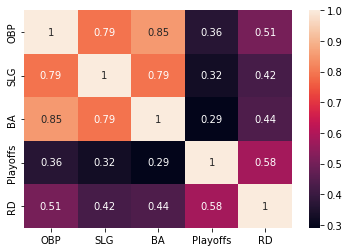

In [8]:
sns.heatmap(df.corr(method='pearson'), annot = True);

## Regressão Linear

In [9]:
rl = linear_model.LinearRegression()
rl.fit(X_train, y_train.ravel())
y_pred_rl = rl.predict(X_test)
print(mean_squared_error(y_test,y_pred_rl))
rl.coef_ 

0.10797303868478926


array([ 4.00629297e+00,  1.15052799e+00, -4.31676157e+00,  1.98711195e-03])

In [19]:
rl.score(X_test, y_test)

0.3628659915539807

In [27]:
X_train.shape

(862, 4)

In [31]:
mse = metrics.mean_squared_error(y_test, y_pred_rl)
mse

0.10797303868478926

In [33]:
np.sqrt(mse)

0.3285925116079021

In [36]:
df['Playoffs'].mean()

0.19805194805194806

## Árvore de decisão - Class

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)
y_pred_treeclf = tree_clf.predict(X_test)

print(tree.export_text(tree_clf))

print(confusion_matrix(y_test,y_pred_treeclf))

print("")

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_treeclf))
print("Precision:",metrics.precision_score(y_test, y_pred_treeclf))
print("Recall:",metrics.recall_score(y_test, y_pred_treeclf))
print("F1-Score:",metrics.f1_score(y_test, y_pred_treeclf))

|--- feature_3 <= 85.50
|   |--- feature_3 <= 40.50
|   |   |--- class: 0
|   |--- feature_3 >  40.50
|   |   |--- class: 0
|--- feature_3 >  85.50
|   |--- feature_3 <= 165.50
|   |   |--- class: 1
|   |--- feature_3 >  165.50
|   |   |--- class: 1

[[266  24]
 [ 22  58]]

Accuracy: 0.8756756756756757
Precision: 0.7073170731707317
Recall: 0.725
F1-Score: 0.7160493827160495


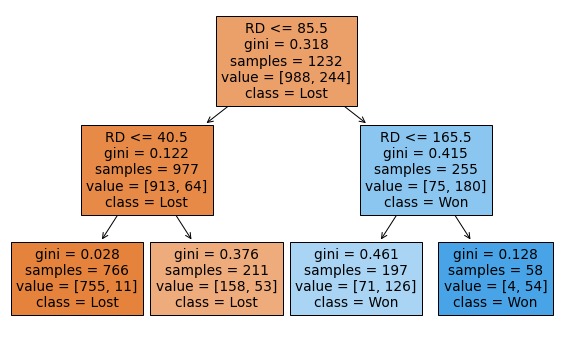

In [50]:
plt.figure(figsize=(10,6))
tree.plot_tree(tree_clf, feature_names=features, class_names=['Lost', 'Won'], filled=True);

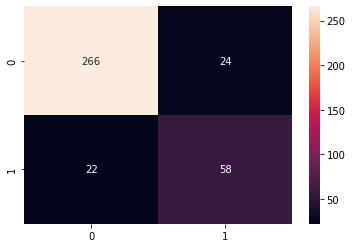

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred_treeclf), annot=True, fmt='d');

## KNN

In [11]:
acc_knn = []
k_history = []
f1_knn = []
for i in range(1, 20):
    k_history.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn.append(metrics.accuracy_score(y_test, y_pred_knn))
    f1_knn.append(metrics.f1_score(y_test, y_pred_knn))

In [12]:
df_knn = pd.DataFrame({'K':k_history, 'ACC':acc_knn, 'F1':f1_knn})
df_knn.sort_values(by = 'F1', inplace=True, ascending=False)
df_knn

,K,ACC,F1
8,9,0.878378,0.720497
6,7,0.875676,0.716049
15,16,0.878378,0.713376
16,17,0.875676,0.712500
18,19,0.875676,0.708861
14,15,0.875676,0.708861
13,14,0.878378,0.705882
7,8,0.875676,0.701299
12,13,0.875676,0.701299
17,18,0.872973,0.700637


In [51]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train,y_train)
y_pred_knn9 = knn.predict(X_test)

In [55]:
print(metrics.classification_report(y_test, y_pred_knn9))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       290
           1       0.72      0.70      0.71        80

    accuracy                           0.88       370
   macro avg       0.82      0.81      0.81       370
weighted avg       0.87      0.88      0.88       370



In [60]:
print(metrics.classification_report(y_test, y_pred_treeclf)) 
# a arvore e o knn foram bem ok e pŕoximos, knn tem um pouquinho mais de recall

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       290
           1       0.71      0.72      0.72        80

    accuracy                           0.88       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.88      0.88      0.88       370



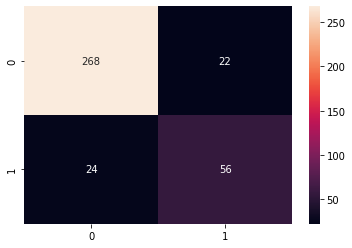

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn9), annot=True, fmt='d');